# SatScan

Import libraries

In [35]:
import sys
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geoplot
import mapclassify
sys.path.append(os.path.abspath('..'))
%matplotlib inline
root = '../'

Read maps file

In [36]:
gd = gpd.read_file(root + "Maps/BRMUE250GC_SIR.shp")
years = ["20" + str(x).zfill(2) for x in range(8,19)]

Plot suicide clusters

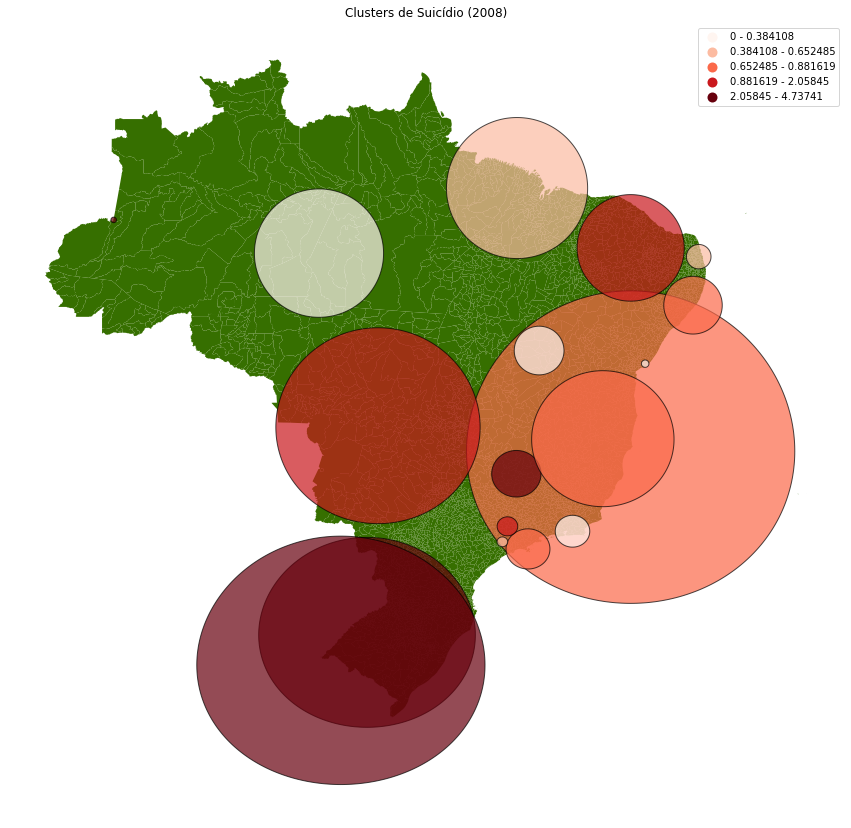

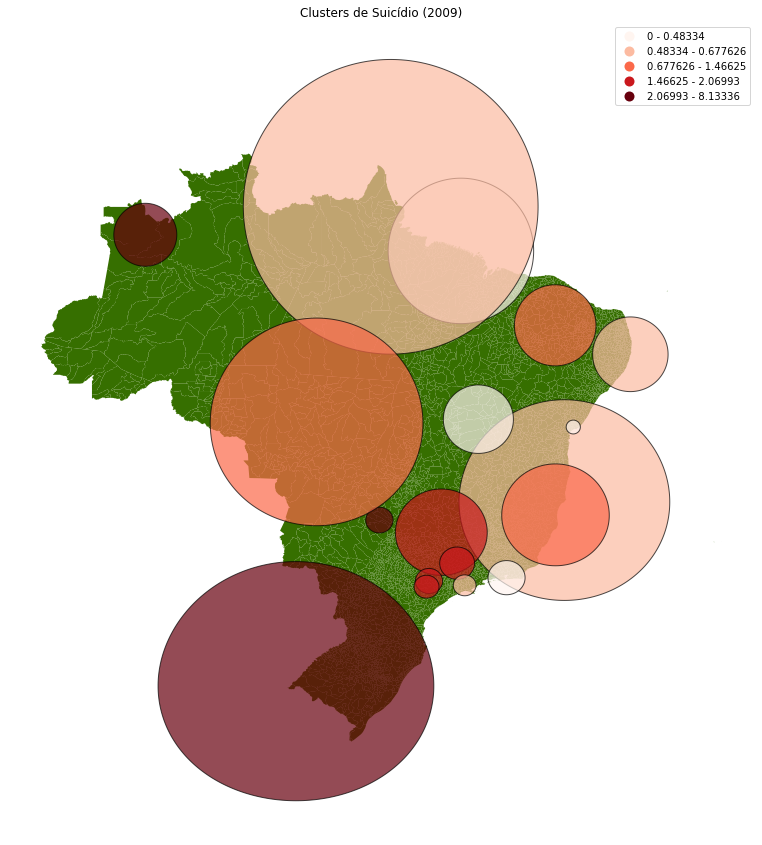

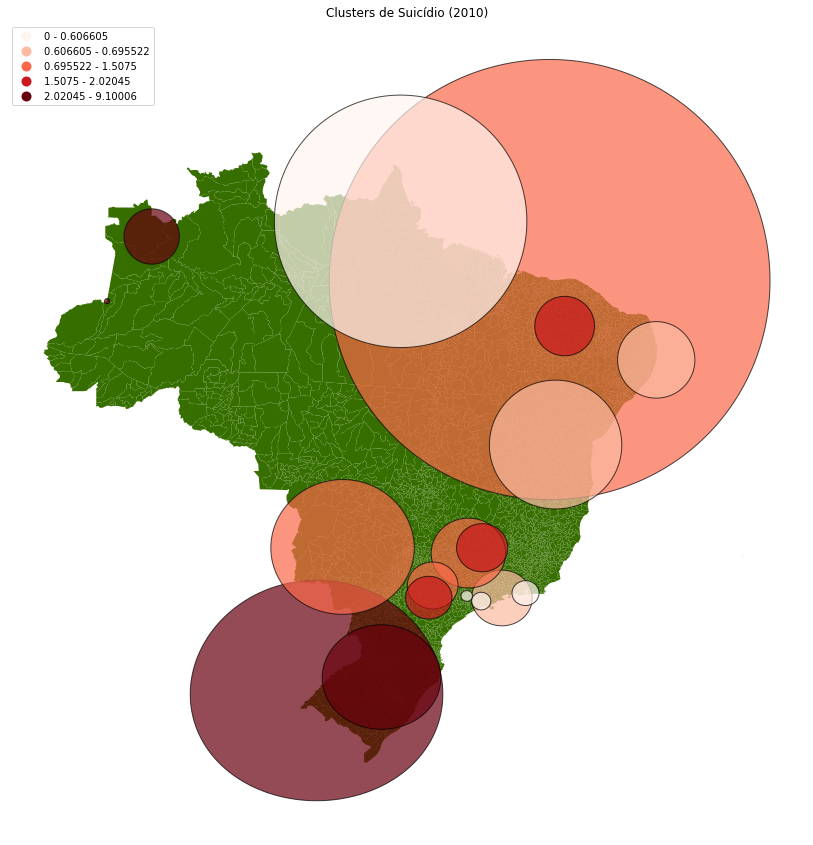

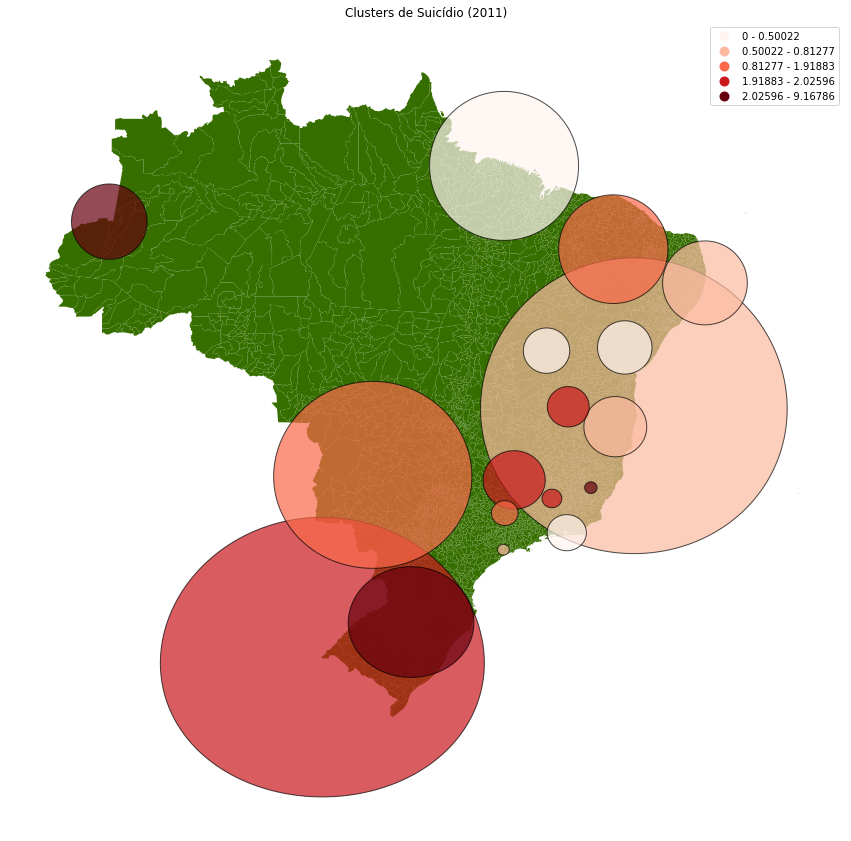

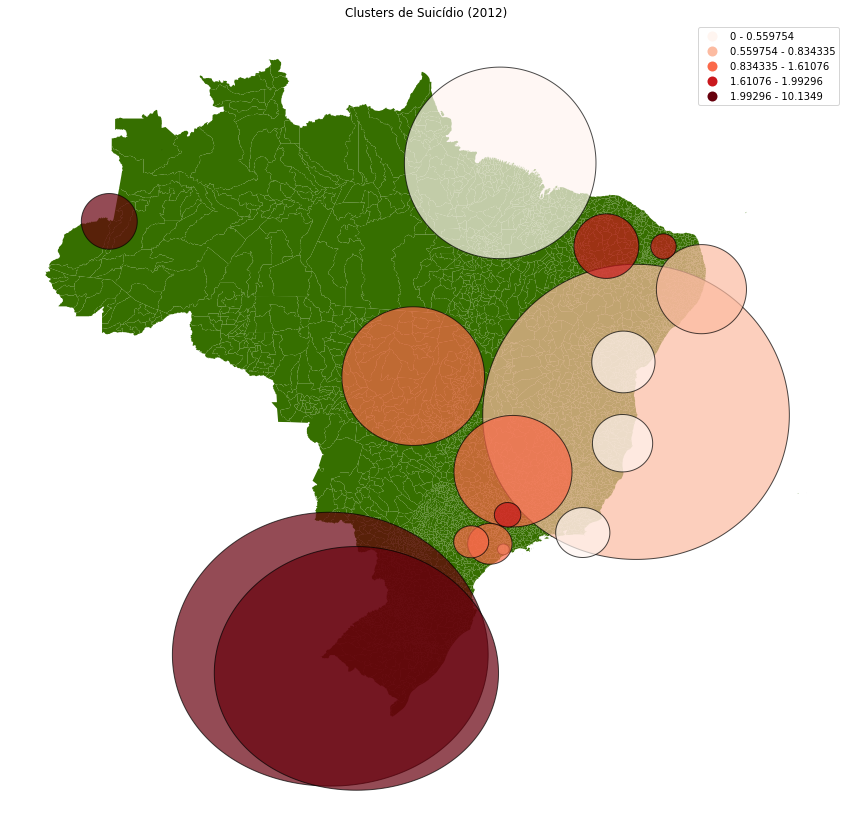

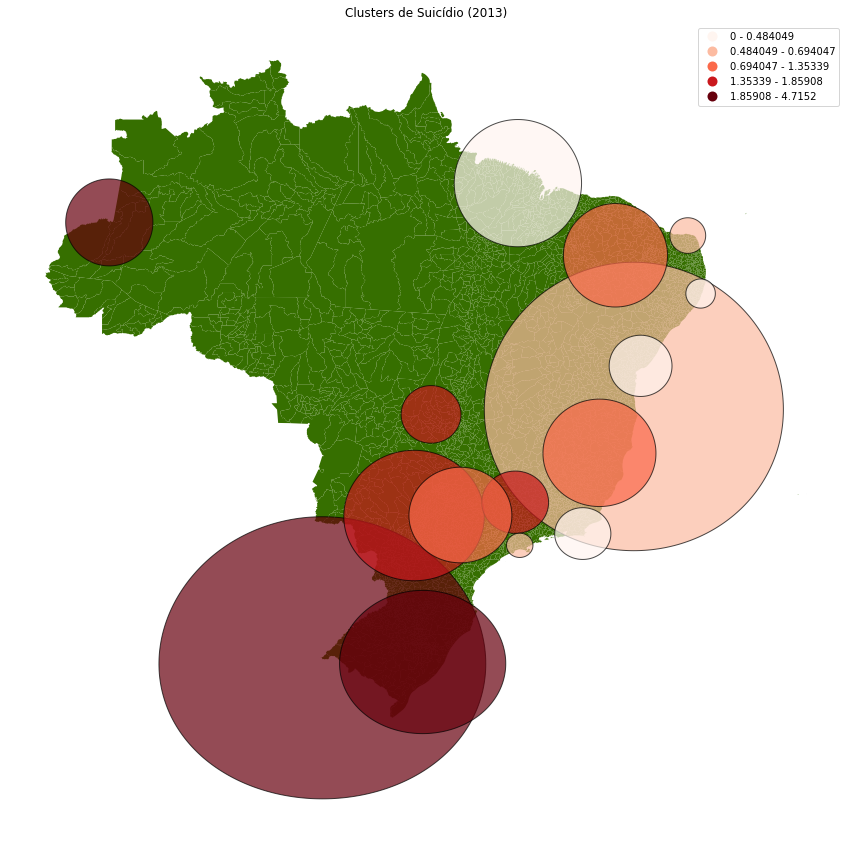

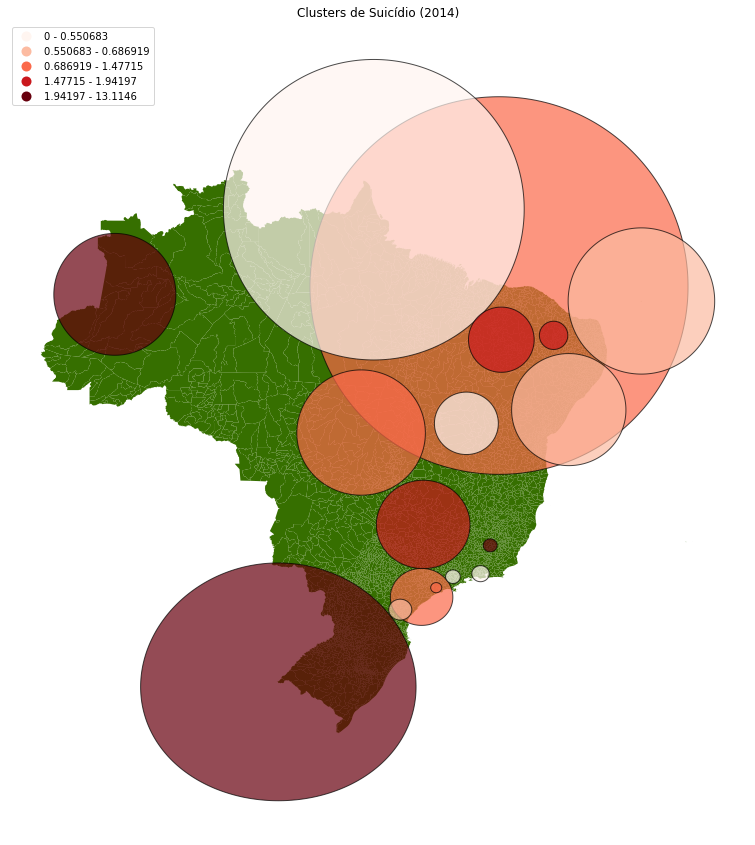

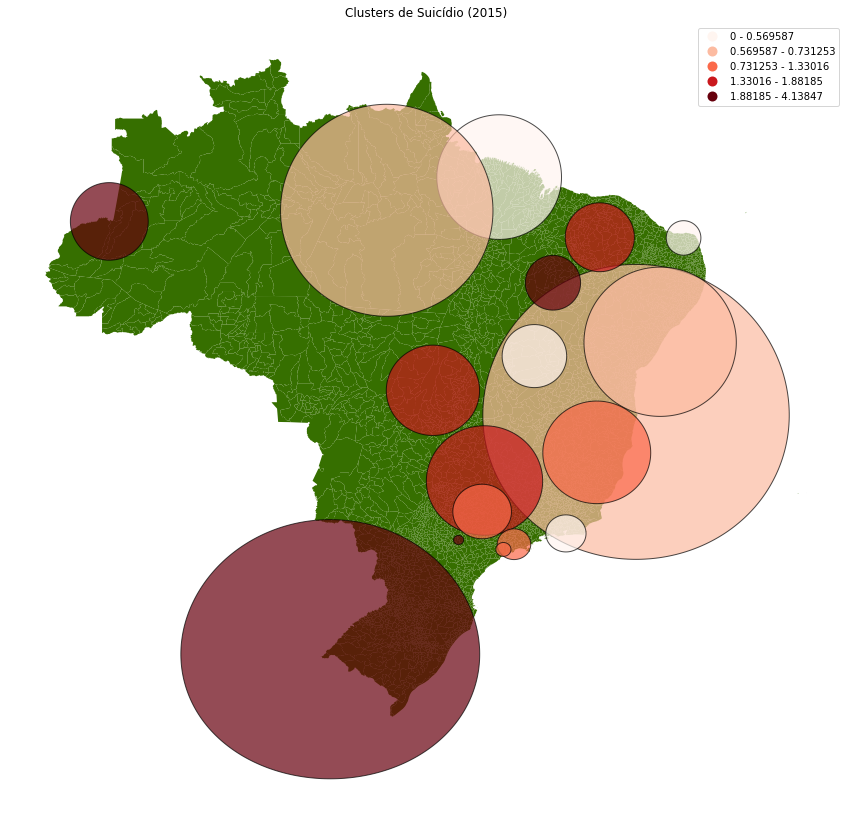

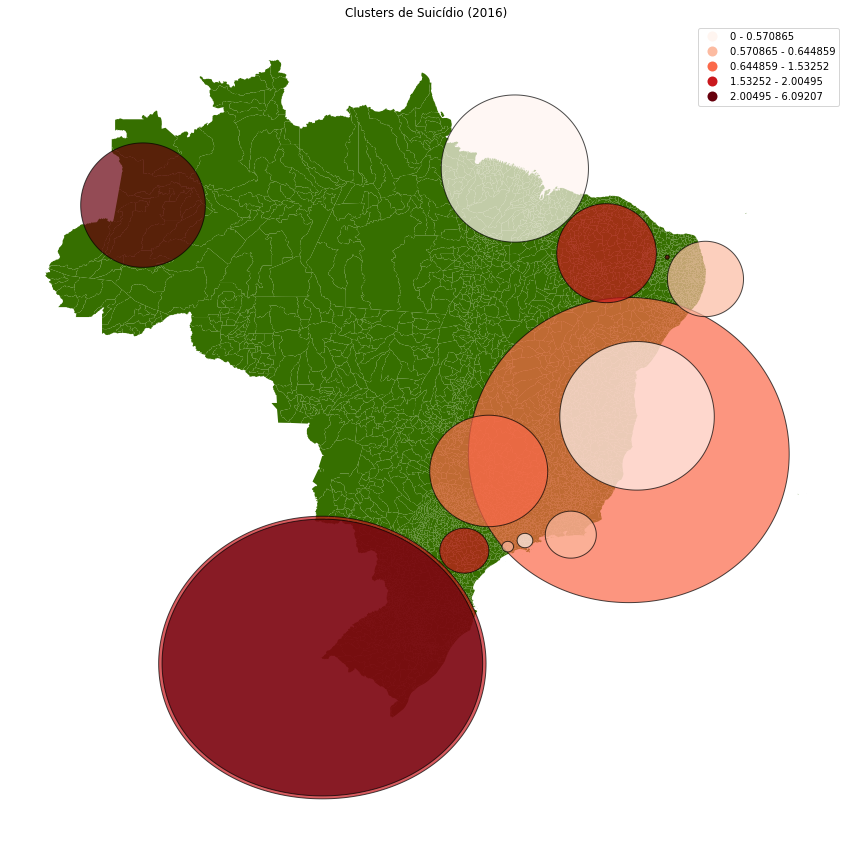

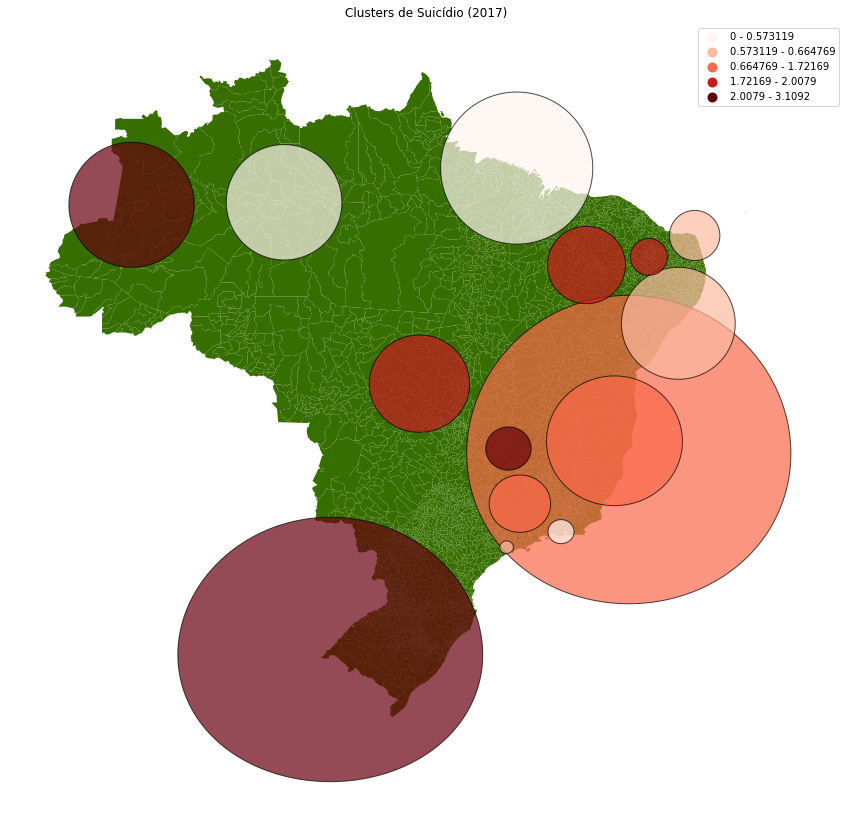

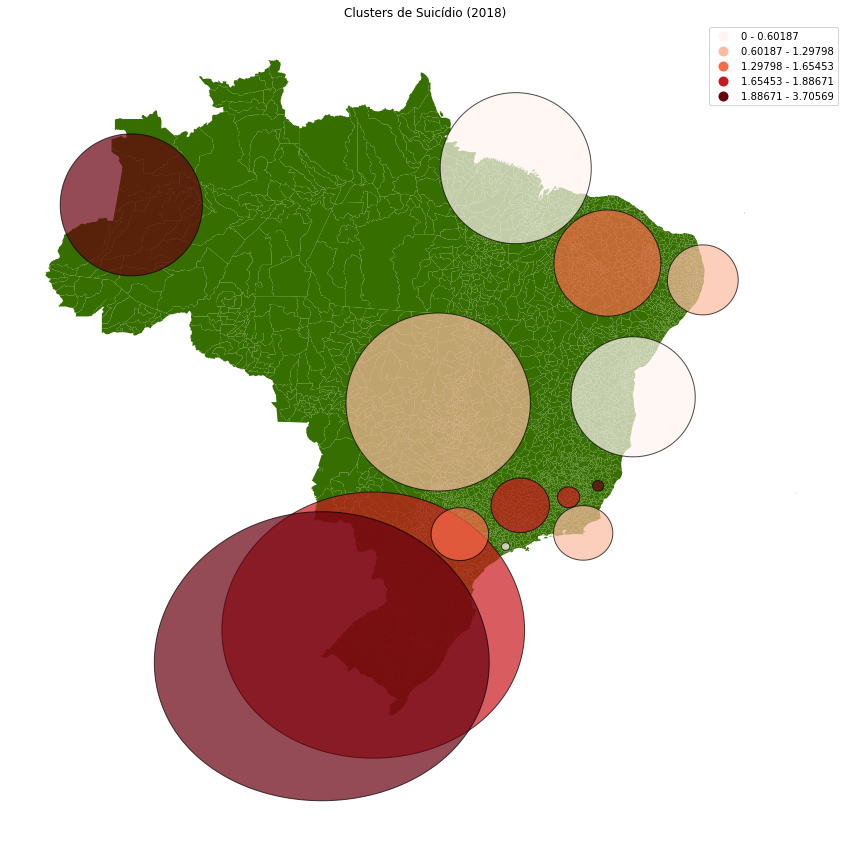

In [39]:
for year in years:
    gdf = gpd.read_file(year + '/output.col.shp')
    gdf = gdf[gdf['P_VALUE'] < 0.05]

    fig, ax = plt.subplots(figsize=(15,15))
    gd.plot(ax=ax, color="#366f00")
    scheme = mapclassify.Quantiles(gdf["REL_RISK"], k=5)
    geoplot.choropleth(
        gdf, hue=gdf["REL_RISK"], scheme=scheme,
        cmap='Reds', ax=ax, legend=True, alpha=0.7
    )
    ax.autoscale(enable=True) 
    plt.title("Clusters de Suicídio (" + year +")")
    plt.savefig('Img/suicide_clusters_' + year + '.png')

Let's highlight the municipalities inside the clusters.

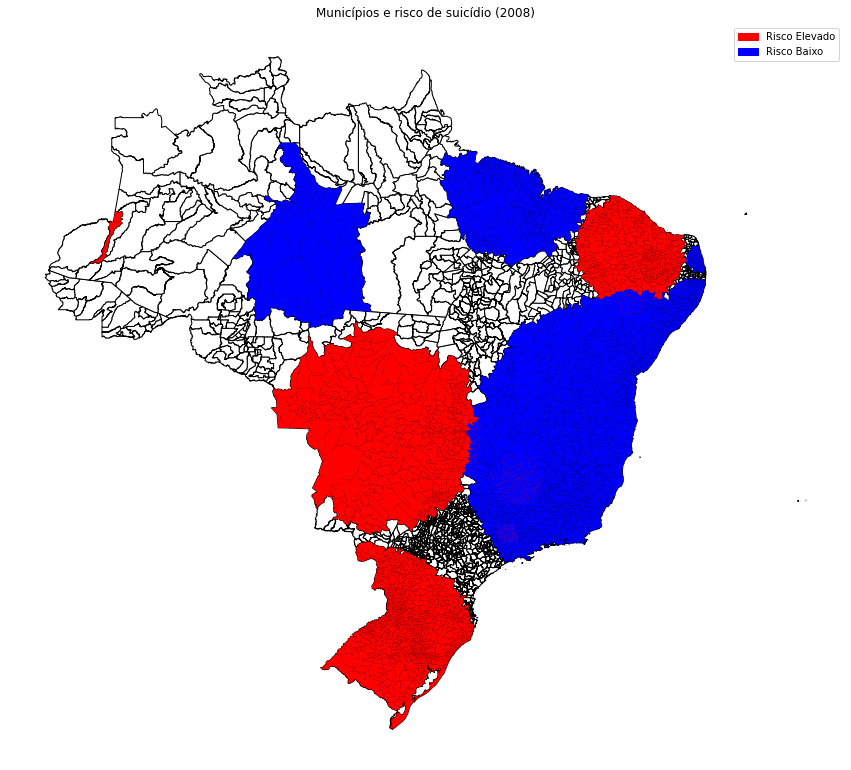

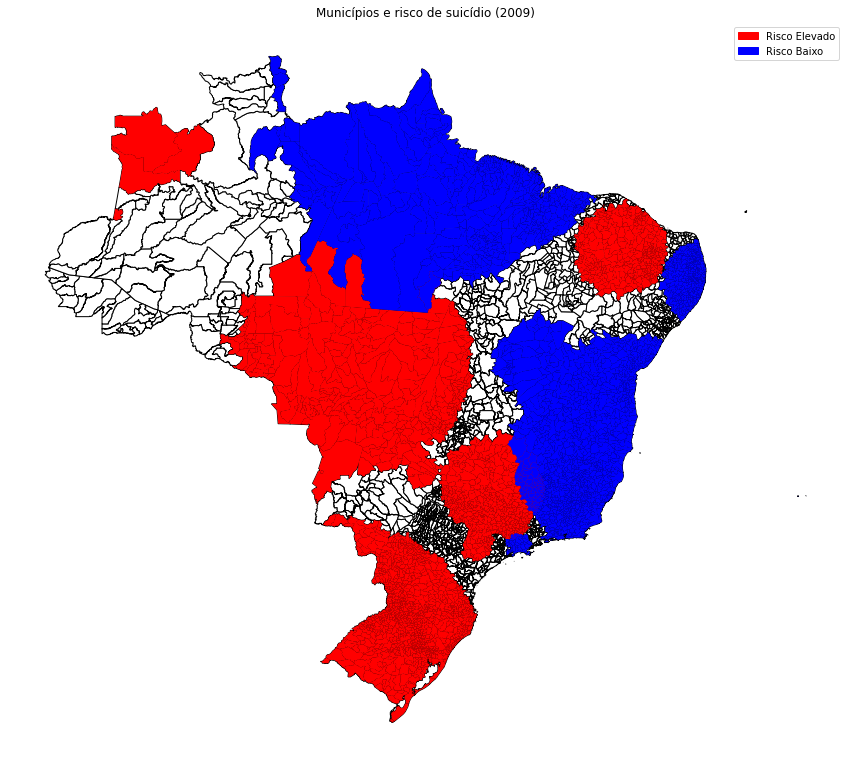

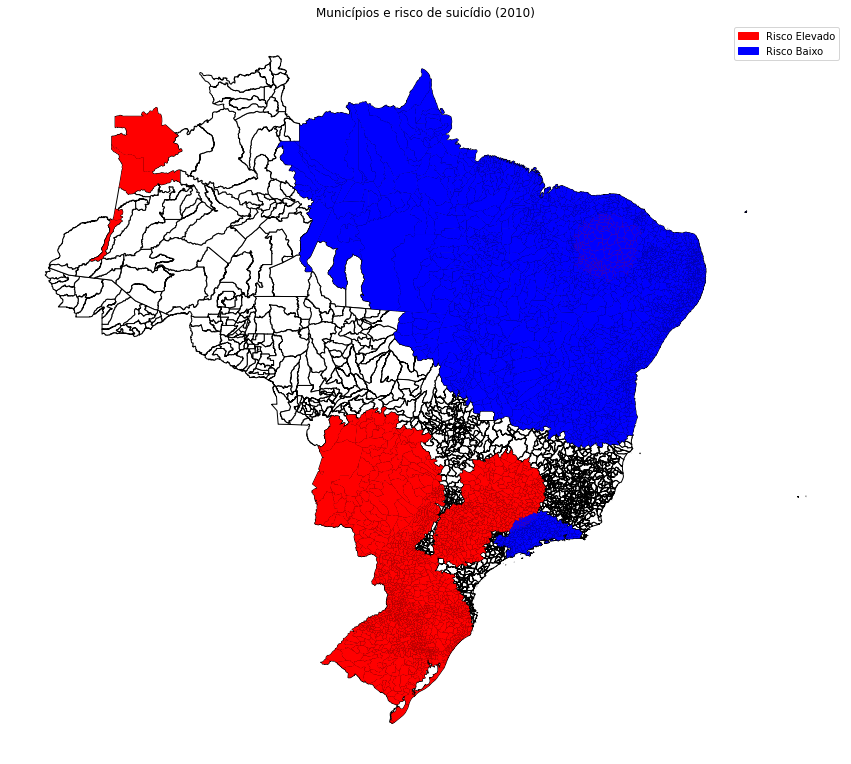

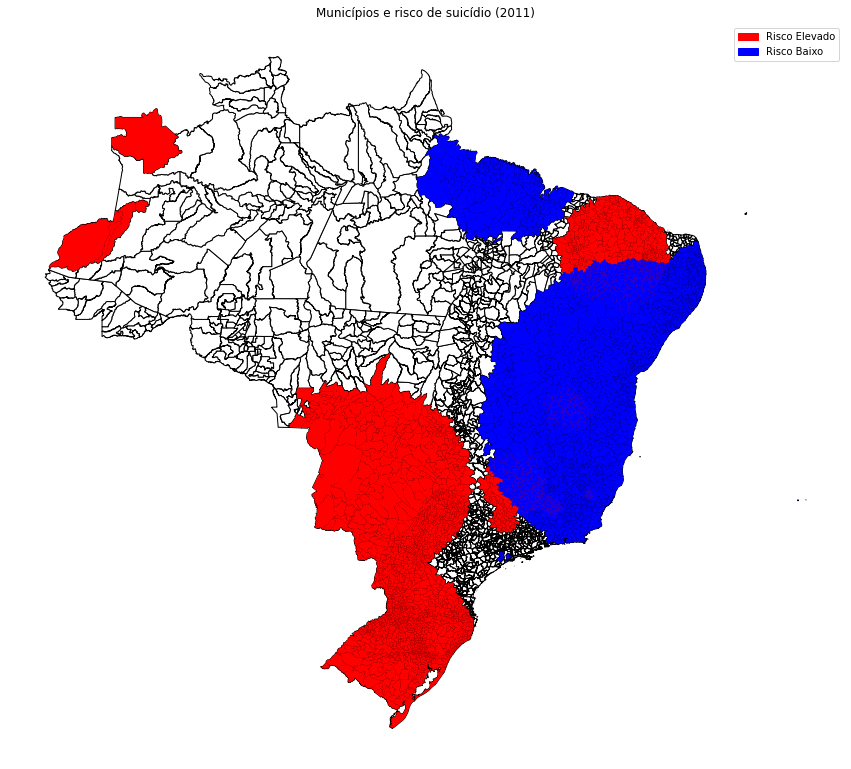

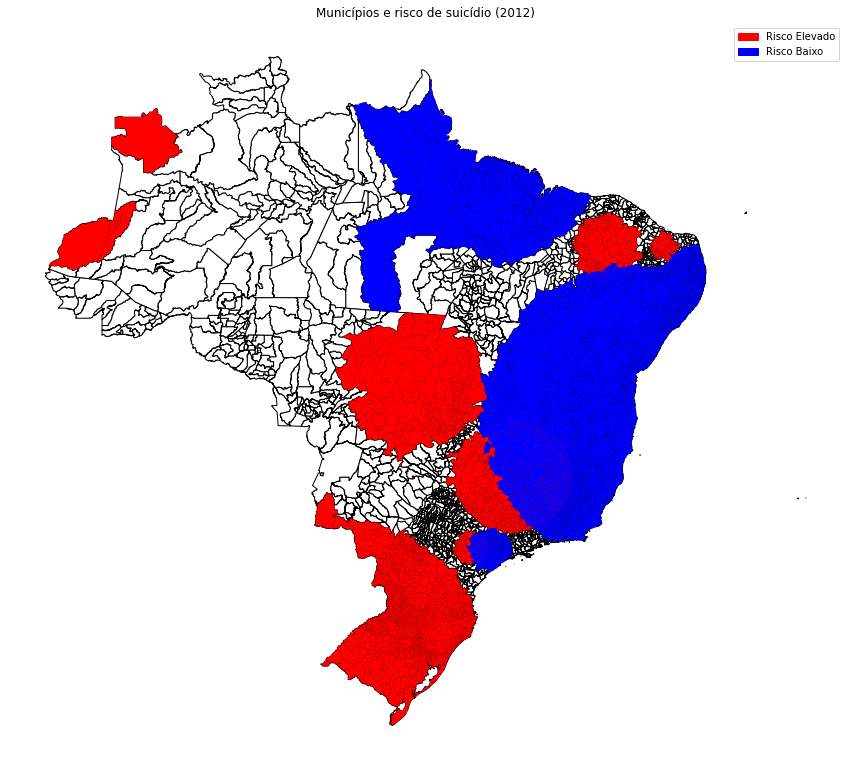

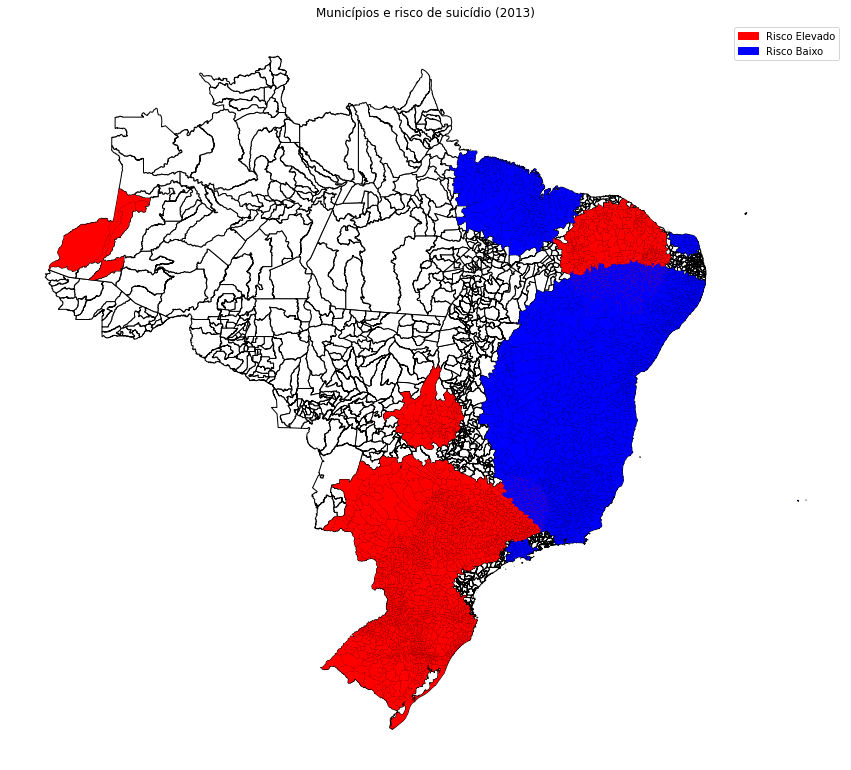

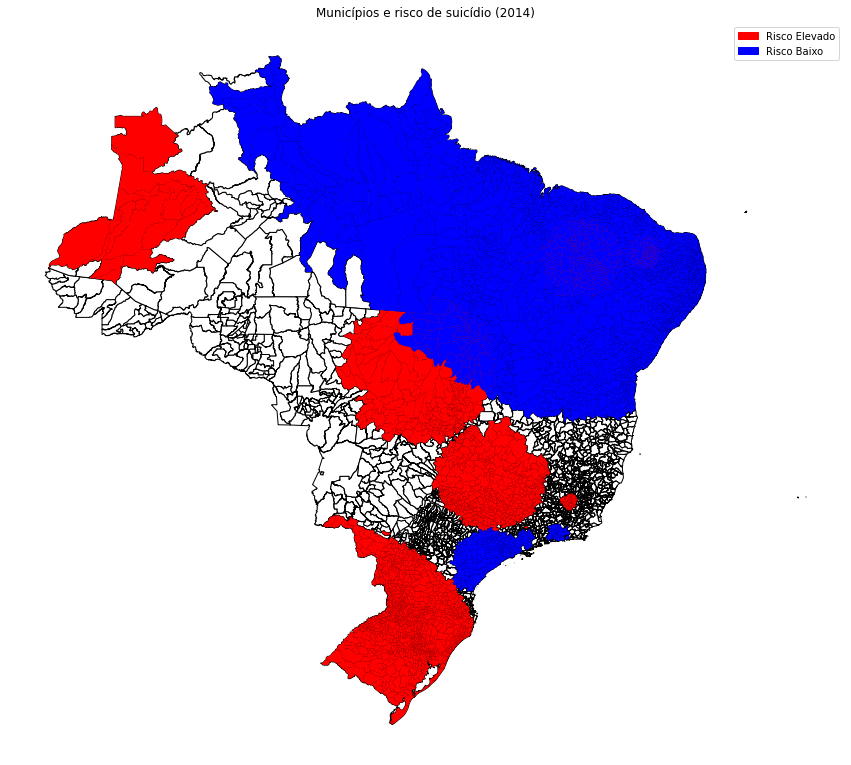

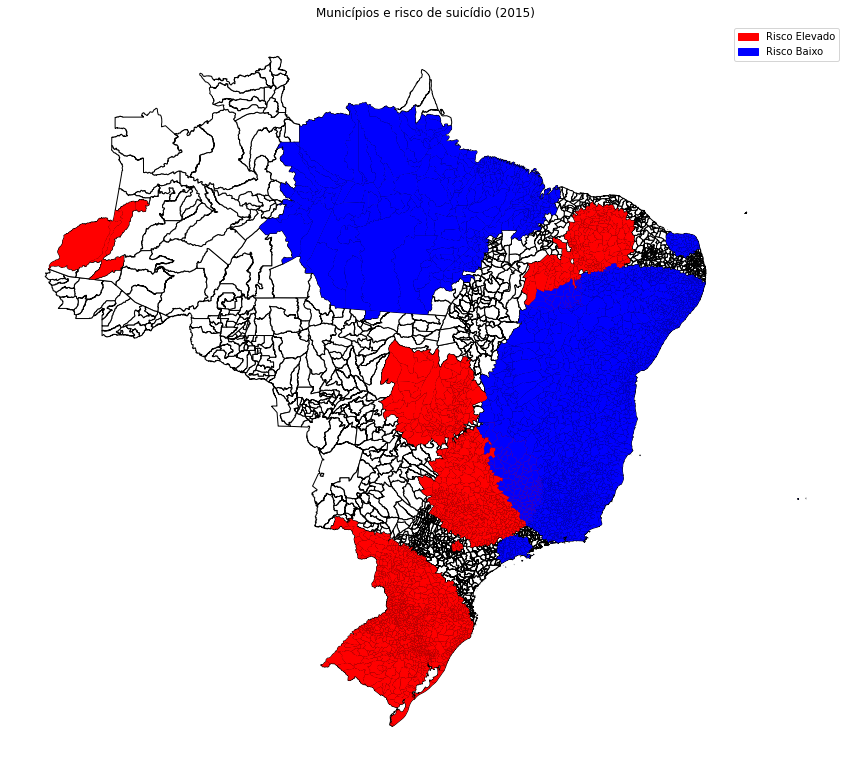

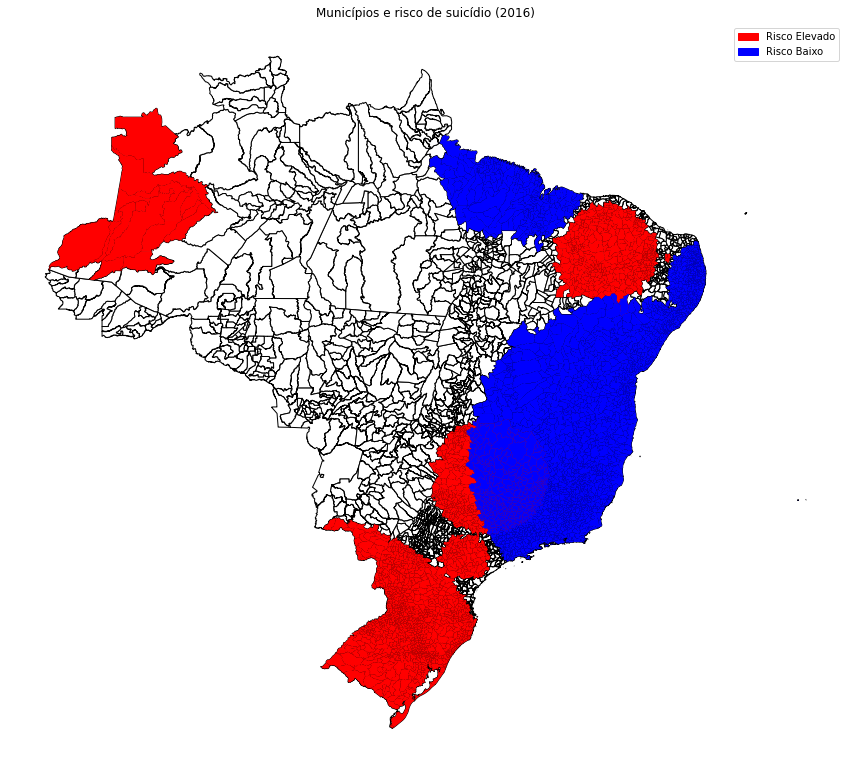

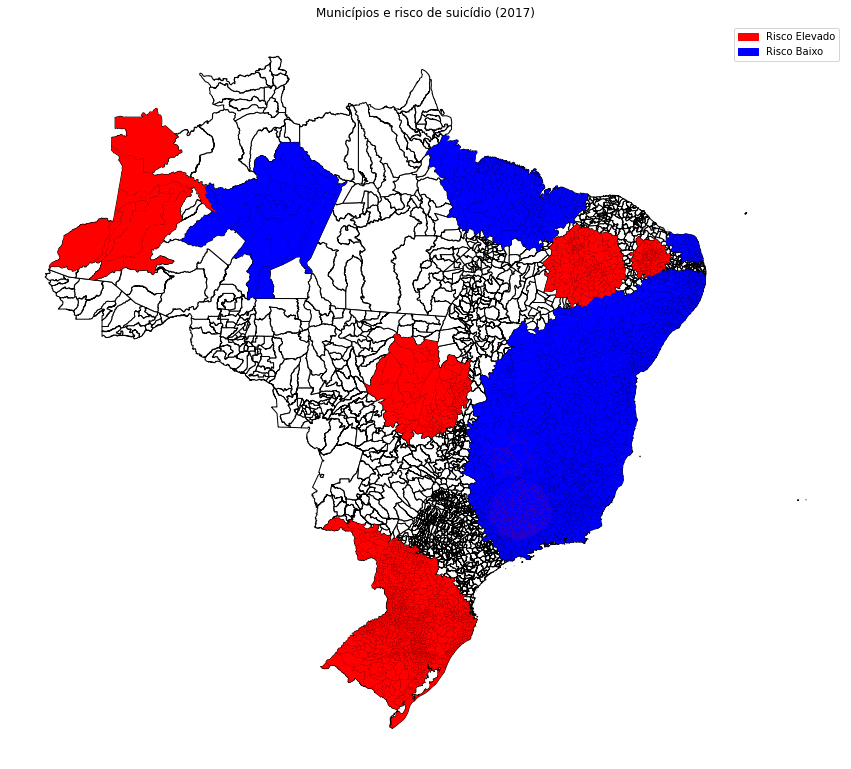

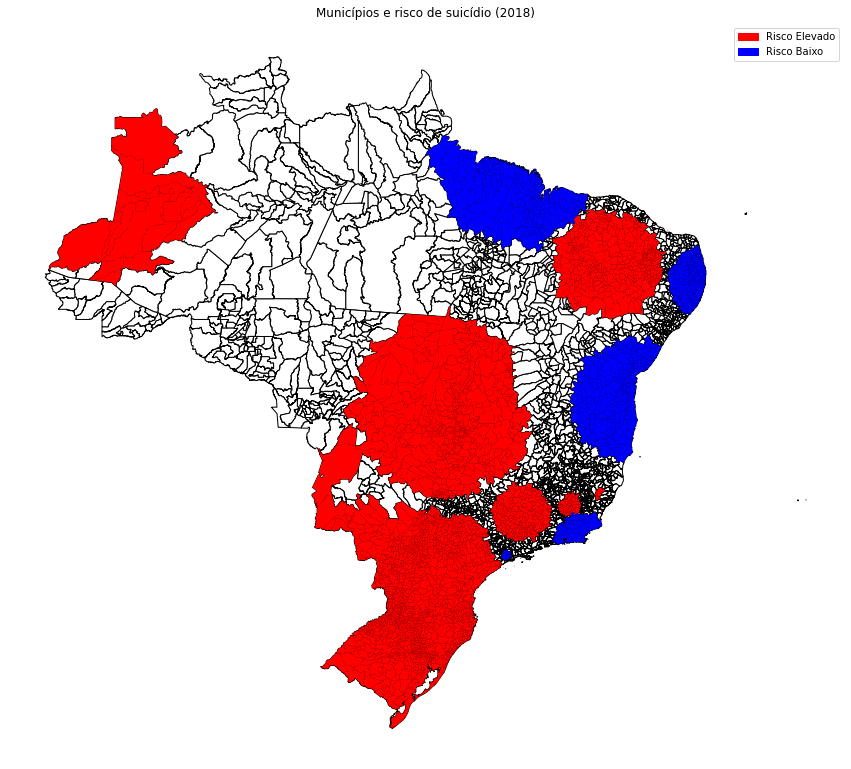

In [46]:
def remove_last_digit(x):
    return np.floor(x.astype(int) / 10).astype(int)
for year in years:
    gis = gpd.read_file(year + '/output.gis.shp')
    gis = gis[gis['P_VALUE'] < 0.05]
    fig, ax = plt.subplots(figsize=(15,15))
    gd.plot(ax=ax, color="white", edgecolor='black')

    mun_risk_ids = gis[gis['CLU_RR'] > 1.0]['LOC_ID'].astype(int).tolist()
    gd_risk = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_risk_ids)]
    plot_risk = gd_risk.plot(ax=ax, color="red")

    mun_moderate_ids = gis[gis['CLU_RR'] < 1.0]['LOC_ID'].astype(int).tolist()
    gd_moderate = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_moderate_ids)]
    plot_moderate = gd_moderate.plot(ax=ax, color="blue")

    red_patch = mpatches.Patch(color='red', label='Risco Elevado')
    blue_patch = mpatches.Patch(color='blue', label='Risco Baixo')
    plt.legend(handles=[red_patch, blue_patch])
    plt.axis('off')
    plt.title("Municípios e risco de suicídio (" + year +")")
    plt.savefig('Img/municipios_risco_suicidio' + year +'.png')